In [37]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import statsmodels.api as sm

In [38]:
# 5.14 setup
data = pd.read_csv("../datasets/larain.dat")
data.index = pd.date_range(
    "1878", periods=len(data), freq="Y"
).year  # add timestamp from exhibit 1.1

best lambda = 0.24594131404604888


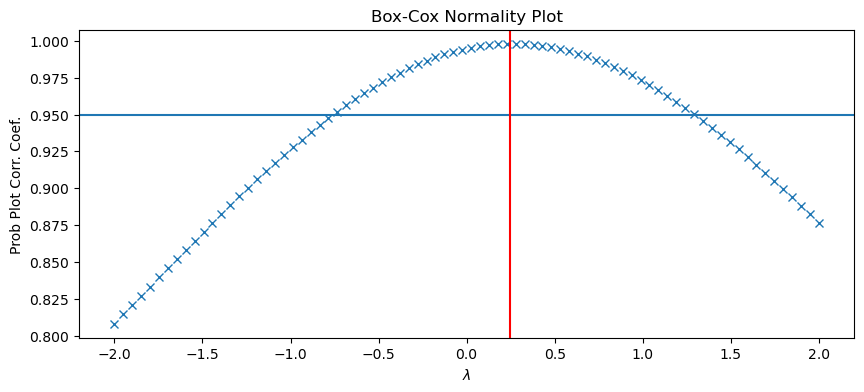

In [39]:
# 5.14 a
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot()
_, lambda_fit = stats.boxcox(data["larain"])
print(f"best lambda = {lambda_fit}")
stats.boxcox_normplot(data["larain"], -2, 2, plot=ax)  # plot the fitted values
ax.axhline(0.95)  # confidence interval
ax.axvline(lambda_fit, color="r")  # plot best lambda value

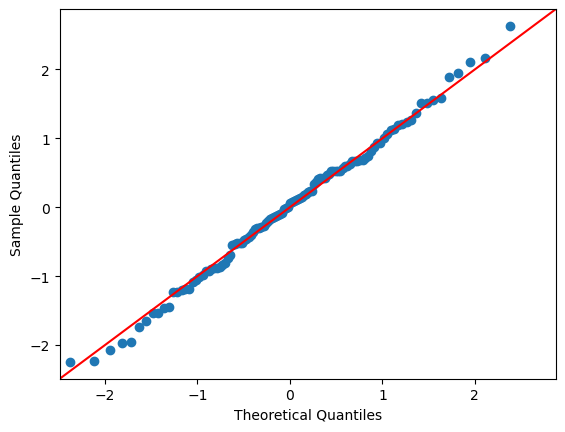

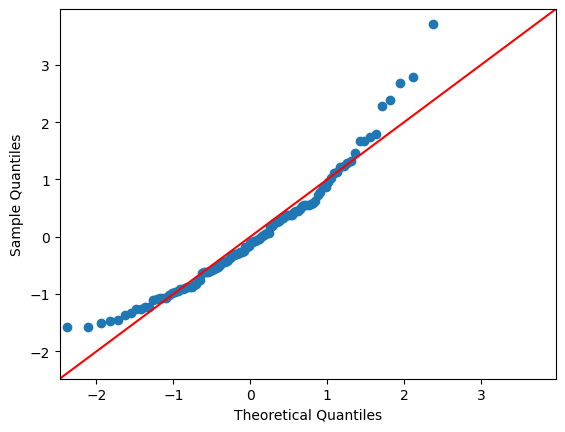

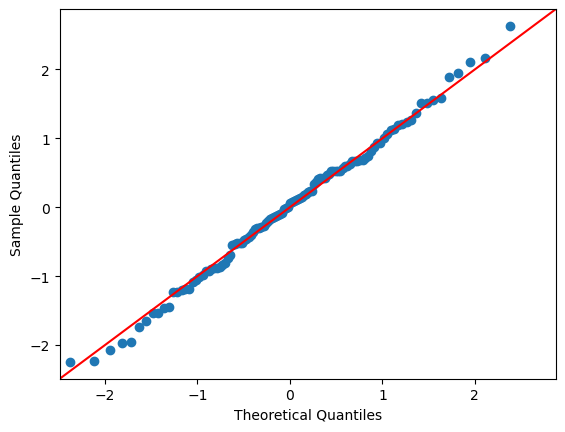

In [40]:
# 5.14 b
transform = stats.boxcox(data["larain"], lmbda=lambda_fit)
sm.qqplot(data["larain"], fit=True, line="45") # original plot
sm.qqplot(transform, fit=True, line="45") #transformed plot
# The transformed data points are more normally distributed

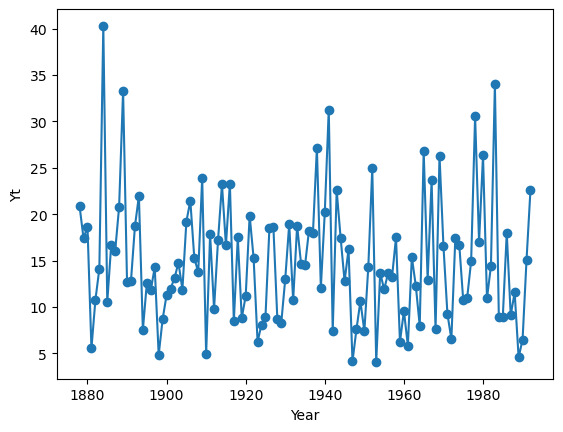

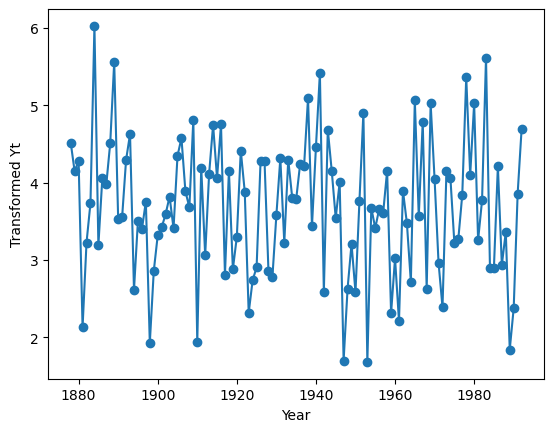

In [41]:
# 5.14 c
data["transform_values"] = transform
plt.xlabel("Year")
plt.ylabel("Transformed Yt")
plt.plot(data.index, data["transform_values"], marker="o")

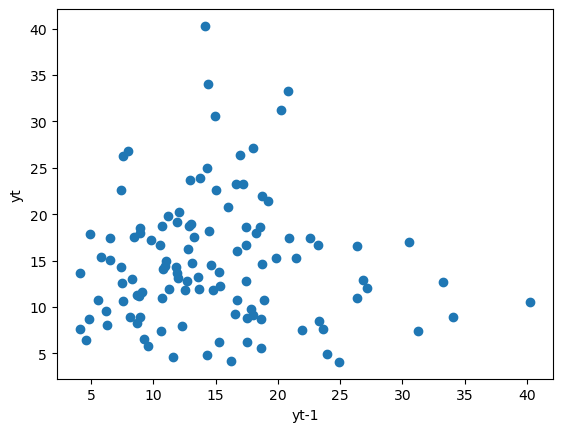

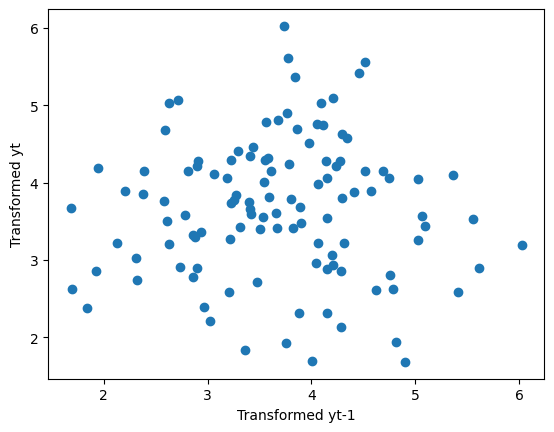

In [42]:
# 5.14 d
data["larain_shift"] = data["larain"].shift(1) # get yt-1
plt.xlabel("yt-1")
plt.ylabel("yt")
plt.plot(data["larain_shift"], data["larain"], marker="o", linestyle='none')

plt.figure()
data["shifted_transformed_values"] = data["transform_values"].shift(1) # get yt-1
plt.xlabel("Transformed yt-1")
plt.ylabel("Transformed yt")
plt.plot(data["shifted_transformed_values"], data["transform_values"], marker="o", linestyle='none')
# the dependence of series values does not change with the transformation


In [43]:
# 5.15 setup
data = pd.read_csv("../datasets/JJ.dat")
data.index = pd.date_range("1960-01", periods=len(data), freq="Q")

Text(0.5, 0, 'Year')

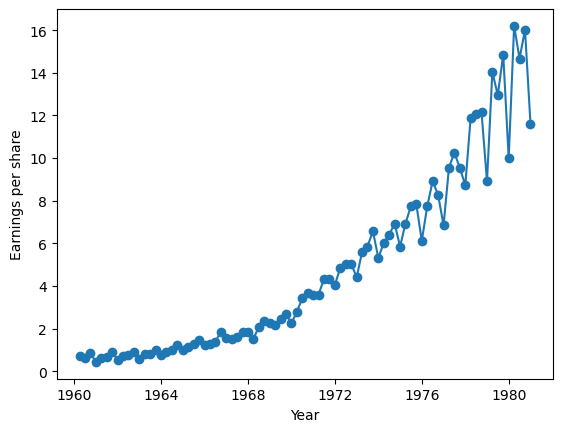

In [44]:
#5.15 a
plt.plot(data.index, data["JJ"], marker="o")
plt.ylabel("Earnings per share")
plt.xlabel("Year")
# seasonal and exponential curve

best lambda = 0.050710310934938496


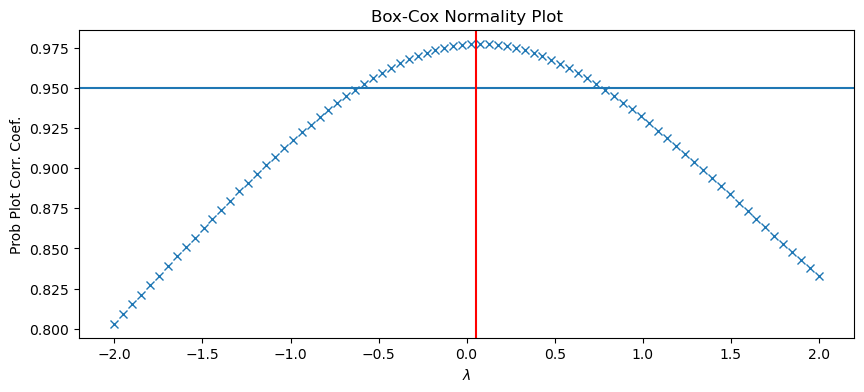

In [50]:
# 5.15 b
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot()
transform, lambda_fit = stats.boxcox(data["JJ"])
stats.boxcox_normplot(data["JJ"], -2, 2, plot=ax)  # plot the fitted values
ax.axhline(0.95)  # confidence interval
ax.axvline(lambda_fit, color="r")  # plot best lambda value
print(f"best lambda = {lambda_fit}")

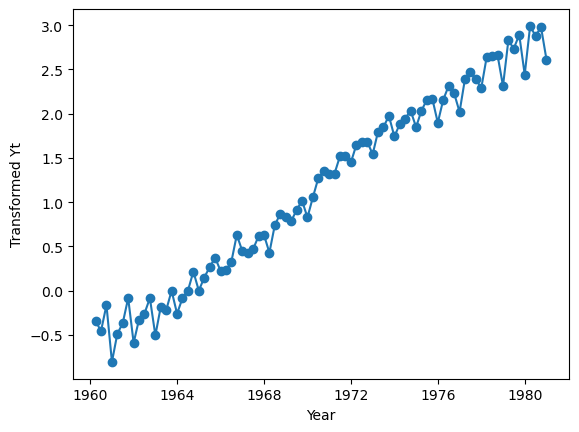

In [46]:
# 5.15 c
data["transform_values"] = transform
plt.xlabel("Year")
plt.ylabel("Transformed Yt")
plt.plot(data.index, data["transform_values"], marker="o")
# No a stationary model is not appropriate because there is a linearly increasing trend and potentially some seasonality

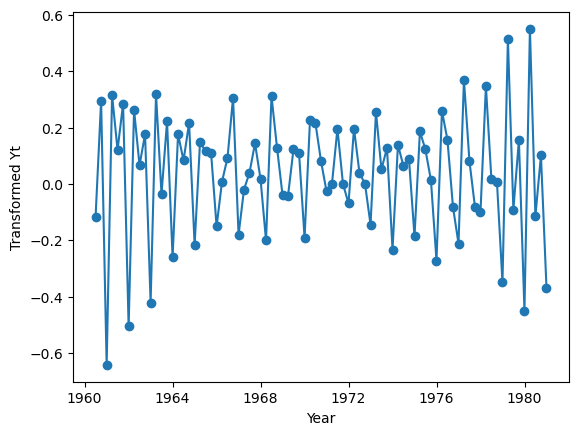

In [47]:
# 5.15 d
diff = data["transform_values"].diff().dropna()
plt.xlabel("Year")
plt.ylabel("Transformed Yt")
plt.plot(data.index[1:], diff, marker="o")
# The linear trend is removed, but there still appears to be some seasonality in the residuals. This may not yet be stationary